# Basic image processes Ⅳ

&copy; 孙正男 3190104890@zju.edu.cn

- Image Scaling
- Add text and graphics

# 1 Image Scaling
<img src=".\images\advanced\Resize_show.png" style="zoom:30%">

## 1.1 基本原理
* 图像缩放（image scaling）是指对数字图像的大小进行调整的过程。图像缩放是一种非平凡的过程，需要在处理效率以及结果的平滑度（smoothness）和清晰度（sharpness）上做一个权衡。
* 基本原理就是一种映射，即缩小后或者放大后的图像像素位置向原图的一个映射。简单理解就是，**将放大或者缩小后的图像将其的坐标（长宽）拉伸或者压缩到和原图一样大时，其像素坐标点对应在原图上的位置就是其映射位置**
<img src=".\images\advanced\scaling_th.png" style="zoom:50%">
* 由上图可以看出，放大或者缩小后的图像的像素值取决于其映射到原图相应位置周围的元素

* 插值法缩放图像第一步——映射：插值法放大图像的第一步都是相同的，遍历新图。计算新图的坐标点像素值对应原图中哪个坐标点的像素值来填充，计算公式为：
$$
srcH = dstH \times \left(\frac {srcHeight} {dstHeight}\right)
$$
$$
srcW = dstW \times \left(\frac {srcWidth} {dstWidth}\right)
$$
<img src=".\images\advanced\scaling_f.png" style="zoom:80%">
* 通过这个映射公式算出来的 scrH,scrW（旧图坐标）有可能是小数，但是坐标点是不存在小数的，都是整数，得想办法把它转换成整数才行。

## 1.2 最邻近插值法
- 
<img src=".\images\advanced\最近邻插值1.png" style="zoom:80%">
<img src=".\images\advanced\最近邻插值2.png" style="zoom:80%">
- 这样的做法会导致像素的变化不连续，在新图中会产生锯齿。

## 1.3 双线性插值法
* 线性插值是指插值函数为**一次多项式的插值方式**，其在插值节点上的插值误差为零。线性插值相比其他插值方式，如抛物线插值，具有简单、方便的特点。线性插值的几何意义即为概述图中利用过A点和B点的直线来近似表示原函数。
* 线性插值可以用来近似代替原函数，也可以用来计算得到查表过程中表中没有的数值。
<img src=".\images\advanced\xianxingchazhi.png" style="zoom:80%">

* 双线性插值：就是在x和y方向个来一次单线性插值
<img src=".\images\advanced\sxxcz.jpg" style="zoom:80%">

* **image scaling in opencv**:
```
cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) → dst
```
    * scr：变换操作的输入图像
    * dsize： 输出图像的大小，二元元组 (width, height)
    * dst：变换操作的输出图像，可选项
    * fx, fy：x 轴、y 轴上的缩放比例，实型，可选项
    * interpolation：插值方法，整型，可选项:
        * cv2.INTER_LINEAR：双线性插值（默认方法）
        * cv2.INTER_AREA：使用像素区域关系重采样，缩小图像时可以避免波纹出现
        * cv2.INTER_NEAREST：最近邻插值
        * cv2.INTER_CUBIC：4x4 像素邻域的双三次插值
        * cv2.INTER_LANCZOS4：8x8 像素邻域的Lanczos插值
     * 返回值：dst，变换操作的输出图像，ndarray 多维数组

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [2]:
# 绘制多张图片的函数
def my_display_imglist(
        img_list:List[np.ndarray],
        titles:List[str],
        figsize:tuple=(8,4)
    ) -> None:
    num = len(img_list)
    # determine subplt shape
    colum = 1
    while colum * colum < num:
        colum += 1
    row = 1
    while row * colum < num:
        row += 1
    # display
    index = 1
    plt.figure(figsize=figsize, dpi=80)
    for img in img_list:
        plt.subplot(row, colum, index)
        
        # 检测是彩色图片还是灰度图
        if np.shape(img)[2] == 3:
            plt.imshow(img)
        elif np.shape(img)[2] == 1:
            plt.imshow(img, 'gray', aspect='auto')
        else:
            raise TypeError
        
        plt.title(titles[index-1])
        index += 1
#     plt.show() 

* 一般有两种缩放方式：
    * 已知目标图像的长宽
    * 已知原图的缩放比例

flower_img.shape:  (413, 660, 3)


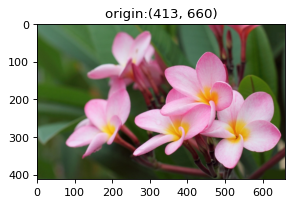

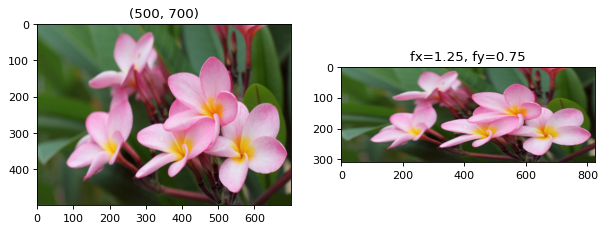

In [3]:
# ImRead
flower_img = cv2.imread(r".\images\beautiful_flower.jpg")
flower_img = cv2.cvtColor(flower_img, cv2.COLOR_BGR2RGB)
print("flower_img.shape: ", flower_img.shape)
# plt
my_display_imglist(
    [flower_img],
    ["origin:"+str(flower_img.shape[:2])],
    figsize=(4,3)
)

# Type 1: 自定义目标图像大小
height, width = (500, 700)
flower_resize_1 = cv2.resize(flower_img, (width, height))

# Type 2: 按比例缩放目标图像
flower_resize_2 = cv2.resize(flower_img, None, fx=1.25, fy=0.75, interpolation=cv2.INTER_LINEAR)

# plt
my_display_imglist(
    [flower_resize_1, flower_resize_2],
    ["(500, 700)",    "fx=1.25, fy=0.75"],
    figsize=(9,5)
)

* 不同插值方法进行比较

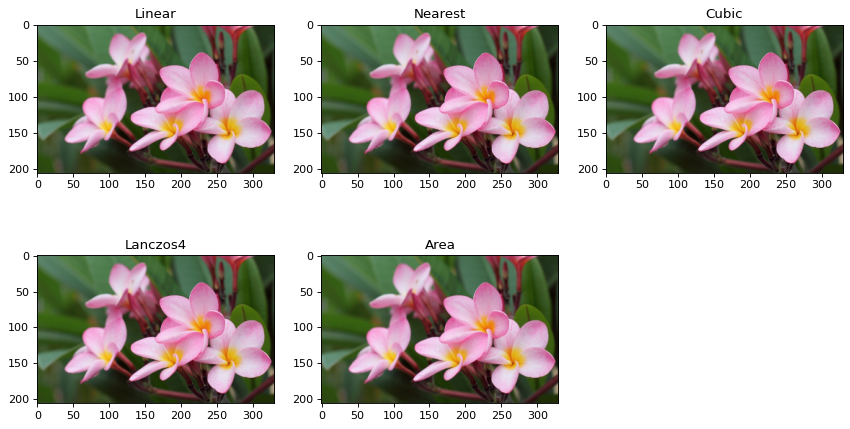

In [4]:
# 双线性插值
flower_resize_linear = cv2.resize(flower_img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
# 最近邻插值
flower_resize_nearest = cv2.resize(flower_img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)
# 4x4 像素邻域的双三次插值
flower_resize_cubic = cv2.resize(flower_img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)
# 8x8 像素邻域的Lanczos插值
flower_resize_lanczos4 = cv2.resize(flower_img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LANCZOS4)
# 使用像素区域关系重采样，缩小图像时可以避免波纹出现
flower_resize_area = cv2.resize(flower_img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# plt
my_display_imglist(
    [flower_resize_linear,
     flower_resize_nearest,
     flower_resize_cubic,
     flower_resize_lanczos4,
     flower_resize_area,],
    ["Linear",
     "Nearest",
     "Cubic",
     "Lanczos4",
     "Area"],
    figsize=(13,7)
)

## 1.4 例题
* 裁剪下图（图片地址为".\images\beautiful_flower.jpg"），裁剪区域为height：171-374，width：56-273，并将裁剪得到的图片放大两倍。裁剪得到的效果应如右图所示
<table>
  <td>
    <img src=".\images\beautiful_flower.jpg" style="zoom:80%">
  </td>
  <td>
    <img src=".\images\examples\beautiful_flower_result.jpg" style="zoom:80%">
  </td>
</table>

读取成功！


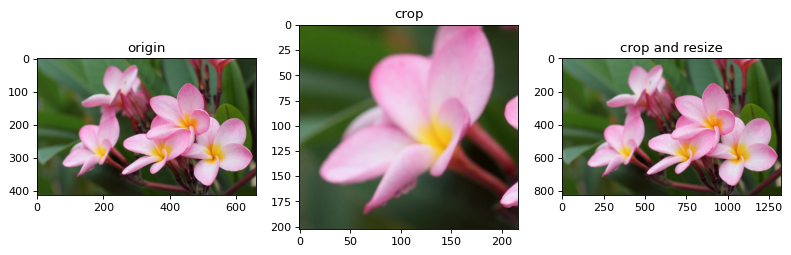

In [5]:
#import
import cv2 
import numpy as np
import matplotlib.pyplot as plt

# imread
img_flower = cv2.imread(r".\images\beautiful_flower.jpg")
img_flower = cv2.cvtColor(img_flower, cv2.COLOR_BGR2RGB)
if isinstance(img_flower, (np.ndarray, np.generic)):
    print("读取成功！")
else:
    raise Exception("读取错误！")

# crop
# img_crop = @todo

# resize
# img_resize = @todo

# plt
index = 0
titles = ["origin",   "crop",   "crop and resize"]
plt.figure(figsize=(12,4), dpi=80)
for img in [img_flower, img_crop, img_resize]:
    plt.subplot(1, 3, index+1)
    plt.imshow(img)
    plt.title(titles[index])
    index += 1

# 2 Add text and graphics